<a href="https://colab.research.google.com/github/uteThAn/BaitapAI_CNN/blob/main/fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
from keras_preprocessing import image
import cv2
import os
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical,load_img,img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.preprocessing import image

In [40]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )
train = train_datagen.flow_from_directory('/content/drive/MyDrive/AI/fruit/train',
                                                 target_size = (128, 128),
                                                 batch_size = 12,
                                                 class_mode ='categorical')
vali_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
vali = vali_datagen.flow_from_directory('/content/drive/MyDrive/AI/fruit/validation',
                                            target_size = (128, 128),
                                            batch_size = 12,
                                            class_mode = 'categorical')

Found 800 images belonging to 10 classes.
Found 101 images belonging to 10 classes.


In [41]:
print("Image Processing.......Compleated")
model = tf.keras.models.Sequential()
print("Building Neural Network.....")
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))
model.add(Dropout(0.2))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

Image Processing.......Compleated
Building Neural Network.....


In [42]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [43]:
print("Training cnn")
history=model.fit( train, validation_data = vali, batch_size = 64,
                            epochs=35,
                           callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience= 5,
            restore_best_weights=True
        )
    ])
model.save("/content/drive/MyDrive/AI/fruit.h5")

Training cnn
Epoch 1/35
67/67 [==============================] - 29s 419ms/step - loss: 2.2093 - accuracy: 0.2900 - val_loss: 1.1623 - val_accuracy: 0.7030
Epoch 2/35
67/67 [==============================] - 28s 418ms/step - loss: 1.0828 - accuracy: 0.6100 - val_loss: 0.9543 - val_accuracy: 0.7525
Epoch 3/35
67/67 [==============================] - 28s 415ms/step - loss: 0.7580 - accuracy: 0.7500 - val_loss: 0.7153 - val_accuracy: 0.8218
Epoch 4/35
67/67 [==============================] - 28s 412ms/step - loss: 0.6842 - accuracy: 0.7613 - val_loss: 0.5598 - val_accuracy: 0.8218
Epoch 5/35
67/67 [==============================] - 28s 412ms/step - loss: 0.5953 - accuracy: 0.7987 - val_loss: 0.4155 - val_accuracy: 0.8713
Epoch 6/35
67/67 [==============================] - 28s 412ms/step - loss: 0.4285 - accuracy: 0.8500 - val_loss: 0.3432 - val_accuracy: 0.9109
Epoch 7/35
67/67 [==============================] - 28s 410ms/step - loss: 0.3977 - accuracy: 0.8600 - val_loss: 0.3554 - val_acc

In [44]:
score=model.evaluate(vali,verbose=1)
print("test loss = ",score[0])
print("test accuracy = ",score[1])

9/9 [==============================] - 2s 164ms/step - loss: 0.2428 - accuracy: 0.9208
test loss =  0.24279431998729706
test accuracy =  0.9207921028137207


In [ ]:
#model=model.load("/content/drive/MyDrive/AI/fruit.h5")

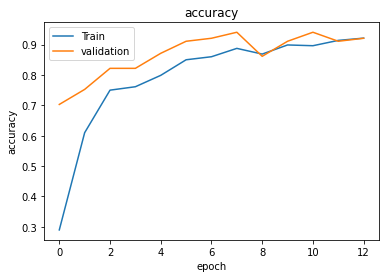

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [46]:
train.class_indices

{'cachua': 0,
 'cam': 1,
 'chuoi': 2,
 'dau': 3,
 'khe': 4,
 'khom': 5,
 'mangcut': 6,
 'tao': 7,
 'traimo': 8,
 'xoai': 9}

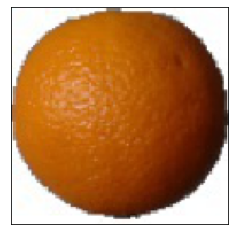

cam


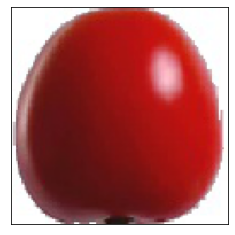

cà chua


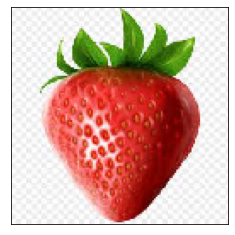

dâu


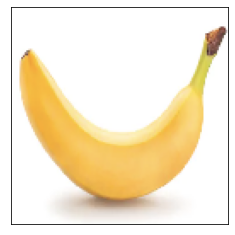

chuối


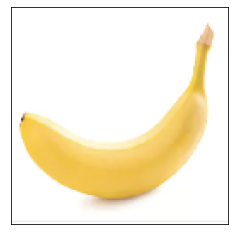

chuối


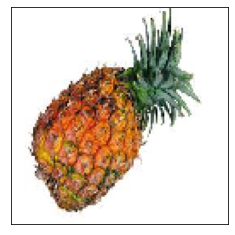

khóm


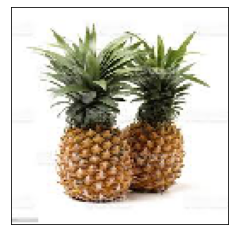

khóm


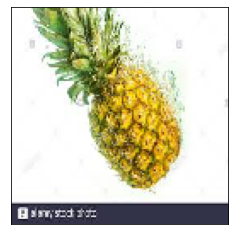

khóm


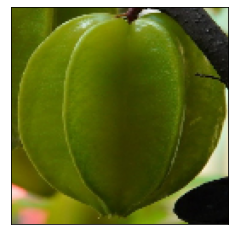

khế


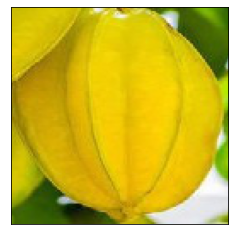

khế


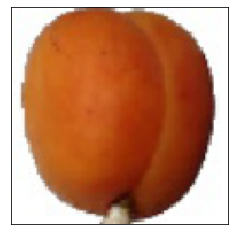

trái mơ


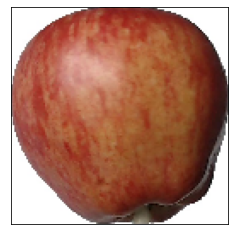

táo


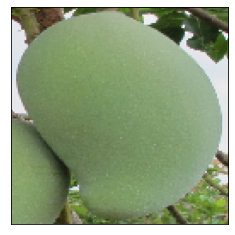

chuối


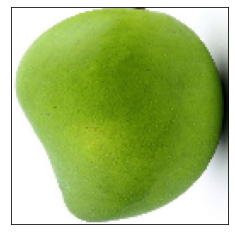

xoài


In [51]:
dir = '/content/drive/MyDrive/AI/fruit/test'
for i in os.listdir(dir):
  img = load_img(dir +'//'+ i, target_size=(128,128))
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  plt.show()
  x= img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  val=np.argmax(model.predict(images))
  if val == 0:
    print("cà chua")
  if val == 1:
    print("cam")
  if val == 2:
    print("chuối")
  if val == 3:
    print("dâu")
  if val == 4:
    print("khế")
  if val == 5:
    print("khóm")
  if val == 6:
    print("măng cụt")
  if val == 7:
    print("táo")
  if val == 8:
    print("trái mơ")
  if val == 9:
    print("xoài")